In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [8]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
x = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [12]:
numerical_features = x.select_dtypes(exclude="object").columns
categorical_features = x.select_dtypes(include="object").columns

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', oh_transformer, categorical_features)
    ])

In [14]:
x = preprocessor.fit_transform(x)

In [15]:
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 19))

In [16]:
x.shape

(1000, 19)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [19]:
def model_evaluation(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    return mse, rmse, r2, mae

In [20]:
models = {
    'LinearRegression': LinearRegression(), 
    'KNeighborsRegressor': KNeighborsRegressor(),   
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),   
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'XGBRegressor': XGBRegressor()
}
models_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    test_mse, test_rmse, test_r2, test_mae = model_evaluation(y_test, y_test_pred)
    train_mse, train_rmse, train_r2, train_mae = model_evaluation(y_train, y_train_pred)
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    print(f"Test MSE: {test_mse}, Test RMSE: {test_rmse}, Test R2: {test_r2}, Test MAE: {test_mae}")
    print(f"Train MSE: {train_mse}, Train RMSE: {train_rmse}, Train R2: {train_r2}, Train MAE: {train_mae}")
    r2_list.append(test_r2)
    print("\n")

LinearRegression
Test MSE: 29.095169866715487, Test RMSE: 5.393993869732843, Test R2: 0.8804332983749565, Test MAE: 4.214763142474851
Train MSE: 28.33487038064859, Train RMSE: 5.323050852720514, Train R2: 0.8743172040139593, Train MAE: 4.266711846071956


KNeighborsRegressor
Test MSE: 52.617, Test RMSE: 7.253757646902741, Test R2: 0.7837702557426202, Test MAE: 5.619
Train MSE: 32.635549999999995, Train RMSE: 5.712753276660913, Train R2: 0.8552410116072555, Train MAE: 4.51675


DecisionTreeRegressor
Test MSE: 65.1, Test RMSE: 8.068457101577723, Test R2: 0.7324713238847629, Test MAE: 6.32
Train MSE: 0.078125, Train RMSE: 0.2795084971874737, Train R2: 0.9996534669718089, Train MAE: 0.01875


RandomForestRegressor
Test MSE: 36.387986579861106, Test RMSE: 6.032245566939488, Test R2: 0.8504634427617626, Test MAE: 4.6749875
Train MSE: 5.131888482638889, Train RMSE: 2.2653671849479258, Train R2: 0.9772368786402809, Train MAE: 1.8082395833333333


AdaBoostRegressor
Test MSE: 37.07790516514647, 

In [22]:
pd.DataFrame({'Model': models_list, 'R2': r2_list}).sort_values(by='R2', ascending=False).reset_index(drop=True)

,Model,R2
0,Ridge,0.880593
1,LinearRegression,0.880433
2,CatBoostRegressor,0.851632
3,RandomForestRegressor,0.850463
4,AdaBoostRegressor,0.847628
5,Lasso,0.825320
6,XGBRegressor,0.821221
7,KNeighborsRegressor,0.783770
8,DecisionTreeRegressor,0.732471
9,SVR,0.728600


In [23]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
mse, rmse, r2, mae = model_evaluation(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, RMSE: {rmse}, R2: {r2}, MAE: {mae}")

Linear Regression - MSE: 29.095169866715487, RMSE: 5.393993869732843, R2: 0.8804332983749565, MAE: 4.214763142474851


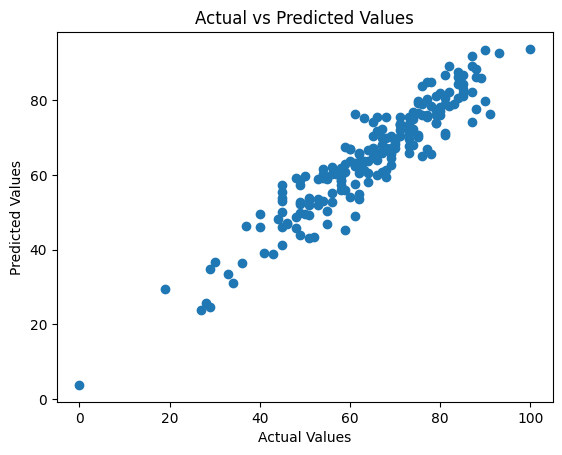

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math_score'>

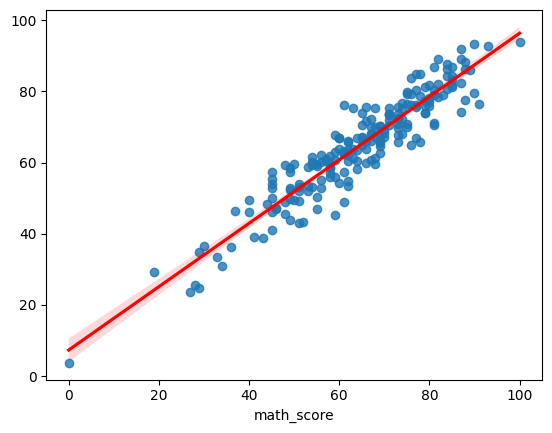

In [25]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})

In [26]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

,Actual,Predicted
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
...,...,...
408,52,43.409149
332,62,62.152214
208,74,67.888395
613,65,67.022287
